In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import aisim as ais

In [ ]:
n = 100000
tau = 100e-6

v = ais.dist.velocity_dist_for_box_pulse_velsel(n, tau)
v2 = ais.dist.velocity_dist_for_gaussian_velsel(n, tau)

(array([9.39204122e-02, 0.00000000e+00, 9.39204122e-02, 9.39204122e-02,
        0.00000000e+00, 0.00000000e+00, 3.75681649e-01, 9.39204122e-02,
        2.81761237e-01, 1.87840824e-01, 4.69602061e-01, 5.63522473e-01,
        1.22096536e+00, 1.31488577e+00, 1.40880618e+00, 2.16016948e+00,
        2.72369195e+00, 3.47505525e+00, 4.78994102e+00, 6.29266762e+00,
        6.19874721e+00, 9.29812081e+00, 1.24914148e+01, 1.49333455e+01,
        1.61543109e+01, 2.17895356e+01, 2.54524317e+01, 3.31539055e+01,
        3.76620853e+01, 4.51757183e+01, 5.68218494e+01, 6.24570741e+01,
        8.27438832e+01, 8.33074057e+01, 9.73954675e+01, 1.06599668e+02,
        1.28670965e+02, 1.42759027e+02, 1.49615217e+02, 1.76570375e+02,
        1.89343551e+02, 2.05967464e+02, 2.35834155e+02, 2.41375459e+02,
        2.57060168e+02, 2.68988061e+02, 2.87959984e+02, 2.91998562e+02,
        2.94440492e+02, 3.14069859e+02, 3.23837581e+02, 3.33417463e+02,
        3.13694177e+02, 3.17732755e+02, 3.13600256e+02, 3.068379

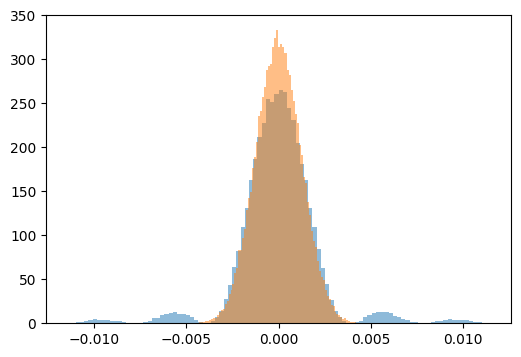

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(v, bins=100, density=True, alpha=0.5)
ax.hist(v2, bins=100, density=True, alpha=0.5);

In [3]:
def box_pulse_ft(f: np.ndarray, pulse_duration: float) -> np.ndarray:
    return np.abs(pulse_duration * np.sinc(pulse_duration * f) ** 2)


def inverse_sample_function(pnts, x_min=-100, x_max=100, n=1e5, **kwargs):
    x = np.linspace(x_min, x_max, int(n))
    y_cumsum = np.cumsum(box_pulse_ft(x, **kwargs))
    y_cumsum = y_cumsum - y_cumsum.min()
    f = interp1d(y_cumsum / y_cumsum.max(), x)

    return f(np.random.random(pnts))

In [8]:
x = inverse_sample_function(10000, pulse_duration=2, x_min=-3, x_max=3)

(array([1.72674613e-03, 8.63373064e-03, 1.55407151e-02, 8.63373064e-03,
        5.18023838e-03, 0.00000000e+00, 1.72674613e-03, 0.00000000e+00,
        1.72674613e-03, 3.45349225e-03, 8.63373064e-03, 8.63373064e-03,
        8.63373064e-03, 1.03604768e-02, 3.45349225e-03, 3.45349225e-03,
        0.00000000e+00, 6.90698451e-03, 8.63373064e-03, 1.03604768e-02,
        1.89942074e-02, 1.72674613e-02, 1.20872229e-02, 5.18023838e-03,
        0.00000000e+00, 0.00000000e+00, 1.03604768e-02, 1.89942074e-02,
        2.93546842e-02, 2.93546842e-02, 2.24476997e-02, 2.59011919e-02,
        8.63373064e-03, 0.00000000e+00, 5.18023838e-03, 2.24476997e-02,
        4.31686532e-02, 8.28838141e-02, 7.07965912e-02, 7.77035757e-02,
        5.52558761e-02, 1.72674613e-02, 6.90698451e-03, 5.69826222e-02,
        2.50378188e-01, 4.64494708e-01, 7.89122980e-01, 1.23289674e+00,
        1.53853080e+00, 1.86833931e+00, 1.97021733e+00, 2.07727559e+00,
        1.77164153e+00, 1.43319929e+00, 1.11720474e+00, 7.235066

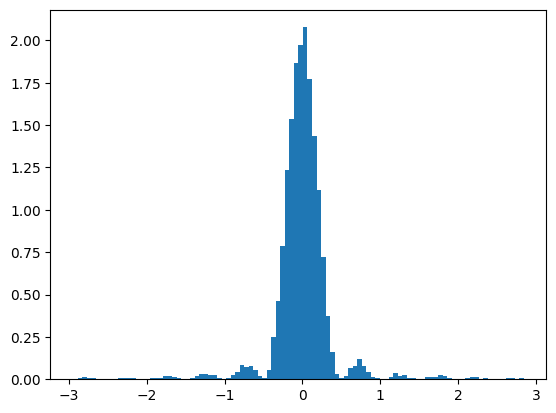

In [9]:
fig, ax = plt.subplots()
ax.hist(x, bins=100, density=True)

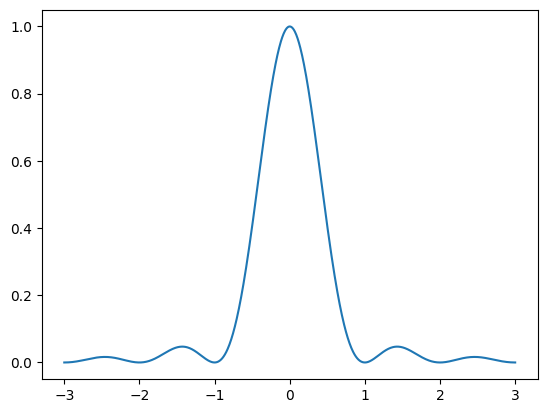

In [ ]:
f = np.linspace(-3, 3, 1000)
pulse_duration = 1

fig, ax = plt.subplots()
ax.plot(f, box_pulse_ft(f, pulse_duration))